ALGORITMO USADO PARA PROCESSAR A CORPORA DO PROJETO INTITULADO: EVIDENCIAS DO USO DE ALGORITMOS DE PROCESSAMENTO DE LINGUAGEM NATURAL E MACHINE LEARNING APLICADOS COMO FERRAMENTA DIAGOSTICA à TRANSVERSALIDADE EM PERNAMBUCO

CODADO ORIGINALMENTE EM PYTHON VIA GOOGLE COLAB, POR RYAN ALMEIDA. UNIVERSIDADE FEDERAL DE PERNAMBUCO, DEPARTAMENTO DE CIÊNCIA POLÍTICA. PARA ANNALS OF DATA ANALYSIS. 2025-2026. EM CASO DE ERROS ENTRE EM CONTATO COM AUTOR.

## **CLASSE TIPO 1 BALANCEADA**

In [6]:
import pandas as pd
import numpy as np

# Leitura do corpus e limpeza
df_corpus_linear_svc = pd.read_csv("/content/corpus_balanceado_tp1.csv")
df_corpus_svm_sem_na = df_corpus_linear_svc.dropna()

# Extração de textos e rótulos
textos_svm = list(df_corpus_svm_sem_na['texto_limpo'].values)
labels_svm = df_corpus_svm_sem_na['label_final'].values

# Vetorização com TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer_svm = TfidfVectorizer()
X_svm_tfidf = tfidf_vectorizer_svm.fit_transform(textos_svm)

# Separação dos dados em treino e teste
from sklearn.model_selection import train_test_split
X_svm_train, X_svm_test, y_svm_train, y_svm_test = train_test_split(
    X_svm_tfidf,
    labels_svm,
    test_size=0.25,
    random_state=0
)

# Treinamento do modelo SVM
from sklearn.svm import LinearSVC
clf_svm = LinearSVC()
clf_svm.fit(X_svm_train, y_svm_train)

# Predição e avaliação
from sklearn.metrics import classification_report
y_svm_pred = clf_svm.predict(X_svm_test)

print(classification_report(
    y_svm_test,
    y_svm_pred,
    target_names=["Positive", "Neutral", "Negative"]
))


              precision    recall  f1-score   support

    Positive       0.97      0.98      0.98      6446
     Neutral       0.94      0.92      0.93      6605
    Negative       0.95      0.96      0.95      6641

    accuracy                           0.95     19692
   macro avg       0.95      0.95      0.95     19692
weighted avg       0.95      0.95      0.95     19692



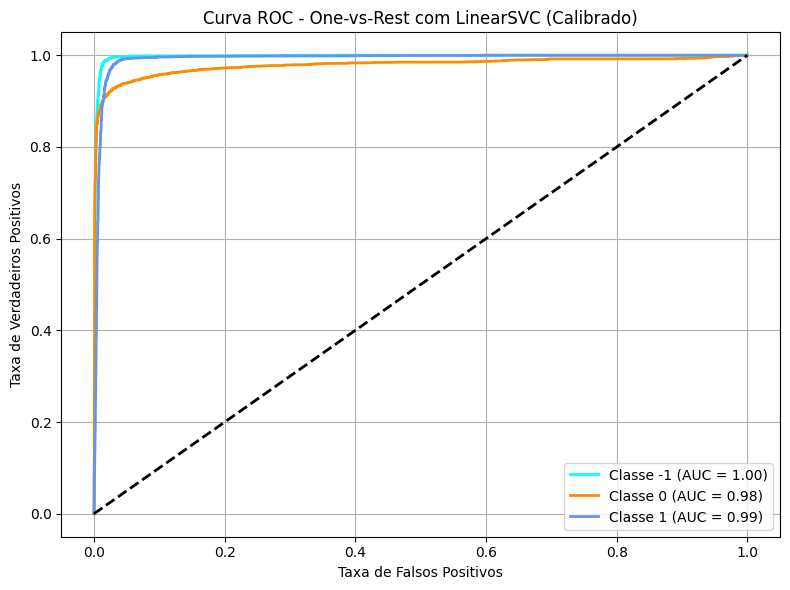

In [2]:

from sklearn.svm import LinearSVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import label_binarize
from sklearn.calibration import CalibratedClassifierCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from itertools import cycle
import numpy as np

# Binariza as labels para avaliação multiclasse
y_bin = label_binarize(labels_svm, classes=np.unique(labels_svm))
n_classes = y_bin.shape[1]

# Usa stratify para manter proporção das classes
X_train, X_test, y_train, y_test = train_test_split(X_svm_tfidf,
                                                    labels_svm,
                                                    test_size=0.2,
                                                    random_state=42,
                                                    stratify=labels_svm)

# Binariza o y_test (usado na avaliação ROC)
y_test_bin = label_binarize(y_test, classes=np.unique(labels_svm))

# Cria um modelo LinearSVC calibrado (com o nome do parâmetro correto para versões < 1.1)
base_svc = LinearSVC(max_iter=10000)
calibrated_svc = CalibratedClassifierCV(estimator=base_svc,
                                        method='sigmoid',
                                        cv=3)

# One-vs-Rest com SVC calibrado
clf_svc = OneVsRestClassifier(calibrated_svc)
clf_svc.fit(X_train, y_train)


# Previsões em forma de probabilidade
y_score = clf_svc.predict_proba(X_test)

# Calcula curva ROC e AUC para cada classe
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Gráfico ROC
colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
plt.figure(figsize=(8, 6))
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'Classe {np.unique(labels_svm)[i]} (AUC = {roc_auc[i]:0.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('TIPO 1')
plt.legend(loc='lower right')
plt.grid(False)
plt.tight_layout()
plt.show()

<Figure size 600x500 with 0 Axes>

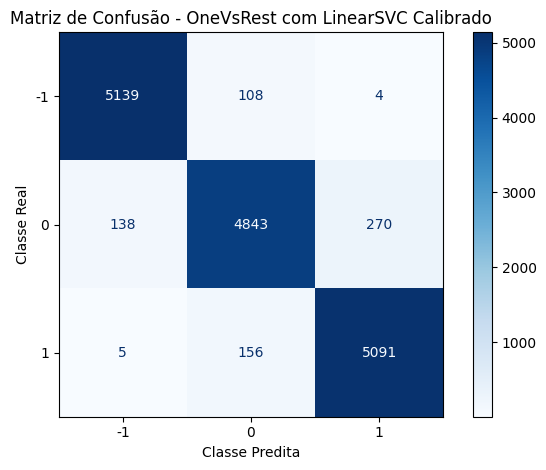

In [3]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Gera as previsões do modelo treinado
y_pred = clf_svc.predict(X_test)

# Gera a matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# Cria o display da matriz de confusão
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=np.unique(labels_svm))

# Plota a matriz de confusão
plt.figure(figsize=(6, 5))
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title("Matriz de Confusão - OneVsRest com LinearSVC Calibrado")
plt.xlabel("Classe Predita")
plt.ylabel("Classe Real")
plt.grid(False)
plt.tight_layout()
plt.show()



## **CLASSE DO TIPO 2 BALANCEADA**

In [8]:
import pandas as pd
import numpy as np

# Leitura do corpus e limpeza
df_corpus_linear_svc = pd.read_csv("/content/corpus_balanceado_tp2.csv")
df_corpus_svm_sem_na = df_corpus_linear_svc.dropna()

# Extração de textos e rótulos
textos_svm = list(df_corpus_svm_sem_na['texto_limpo'].values)
labels_svm = df_corpus_svm_sem_na['espectro_tipo2'].values

# Vetorização com TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer_svm = TfidfVectorizer()
X_svm_tfidf = tfidf_vectorizer_svm.fit_transform(textos_svm)

# Separação dos dados em treino e teste
from sklearn.model_selection import train_test_split
X_svm_train, X_svm_test, y_svm_train, y_svm_test = train_test_split(
    X_svm_tfidf,
    labels_svm,
    test_size=0.25,
    random_state=0
)

# Treinamento do modelo SVM
from sklearn.svm import LinearSVC
clf_svm = LinearSVC()
clf_svm.fit(X_svm_train, y_svm_train)

# Predição e avaliação
from sklearn.metrics import classification_report
y_svm_pred = clf_svm.predict(X_svm_test)

labels_ordem = [-5, -4, -3, -2, 0, 2, 3, 4, 5, 6]

nomes_classes = [
    "-5",
    "-4",
    "-3",
    "-2",
    "0",
    "2",
    "3",
    "4",
    "5",
    "6"
]

print(classification_report(
    y_svm_test,
    y_svm_pred,
    labels=labels_ordem,
    target_names=nomes_classes
))



              precision    recall  f1-score   support

          -5       0.44      0.34      0.38       731
          -4       0.31      0.37      0.33       703
          -3       0.56      0.55      0.55       738
          -2       0.27      0.17      0.21       702
           0       0.20      0.10      0.14       738
           2       0.32      0.26      0.29       729
           3       0.49      0.45      0.47       740
           4       0.31      0.46      0.37       731
           5       0.25      0.26      0.25       756
           6       0.42      0.68      0.51       747

    accuracy                           0.36      7315
   macro avg       0.36      0.36      0.35      7315
weighted avg       0.36      0.36      0.35      7315



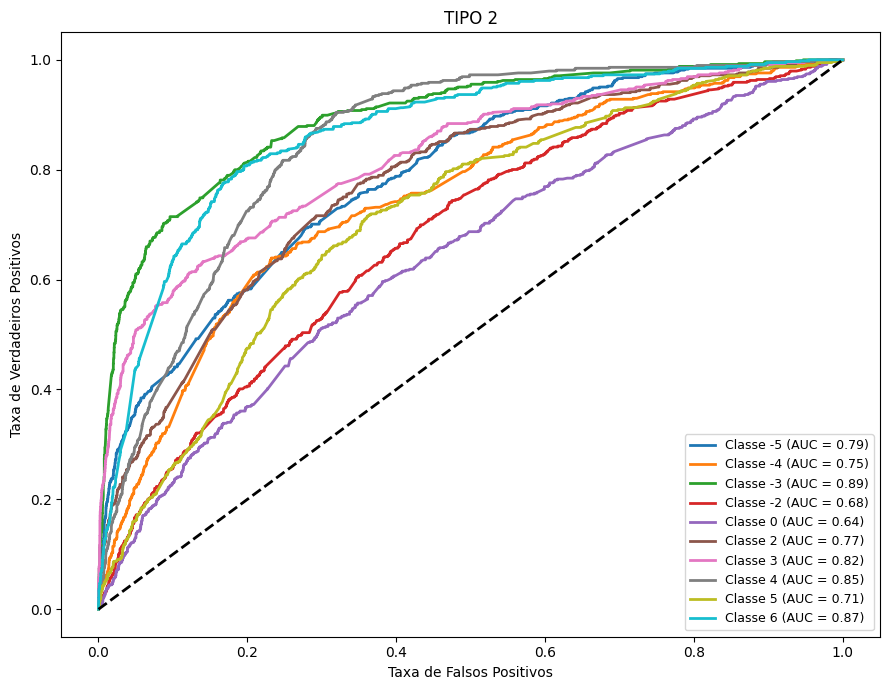

In [12]:
from sklearn.svm import LinearSVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import label_binarize
from sklearn.calibration import CalibratedClassifierCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from itertools import cycle
import numpy as np

labels_ordem = [-5, -4, -3, -2, 0, 2, 3, 4, 5, 6]

y_bin = label_binarize(labels_svm, classes=labels_ordem)
n_classes = y_bin.shape[1]

X_train, X_test, y_train, y_test = train_test_split(
    X_svm_tfidf,
    labels_svm,
    test_size=0.2,
    random_state=42,
    stratify=labels_svm
)

y_test_bin = label_binarize(y_test, classes=labels_ordem)

base_svc = LinearSVC(
    max_iter=10000,
    class_weight="balanced"
)

calibrated_svc = CalibratedClassifierCV(
    estimator=base_svc,
    method='sigmoid',
    cv=3
)

clf_svc = OneVsRestClassifier(calibrated_svc)
clf_svc.fit(X_train, y_train)

y_score = clf_svc.predict_proba(X_test)

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
colors = cycle(plt.cm.tab10.colors)

plt.figure(figsize=(9, 7))

for i, color in zip(range(n_classes), colors):
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        lw=2,
        label=f'Classe {labels_ordem[i]} (AUC = {roc_auc[i]:0.2f})'
    )

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('TIPO 2')
plt.legend(loc='lower right', fontsize=9)
plt.grid(False)
plt.tight_layout()
plt.show()



<Figure size 800x700 with 0 Axes>

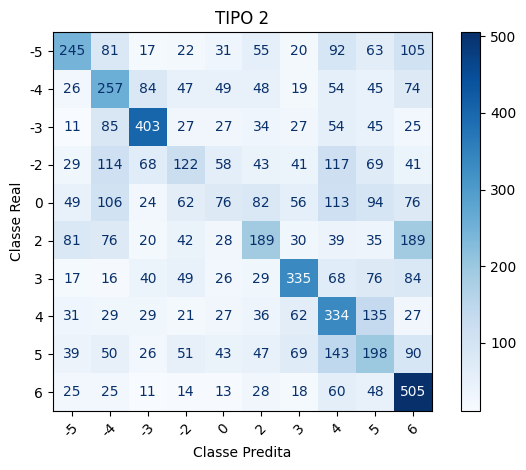

In [13]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# Ordem explícita das classes (MESMA do classification_report)
labels_ordem = [-5, -4, -3, -2, 0, 2, 3, 4, 5, 6]

nomes_classes = [
    "-5",
    "-4",
    "-3",
    "-2",
    "0",
    "2",
    "3",
    "4",
    "5",
    "6"
]

# Gera as previsões do modelo treinado
y_svm_pred = clf_svm.predict(X_svm_test)

# Gera a matriz de confusão com ordem controlada
cm = confusion_matrix(
    y_svm_test,
    y_svm_pred,
    labels=labels_ordem
)

# Cria o display da matriz de confusão
disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=nomes_classes
)

# Plota a matriz de confusão
plt.figure(figsize=(8, 7))
disp.plot(
    cmap=plt.cm.Blues,
    values_format='d',
    xticks_rotation=45
)

plt.title("TIPO 2")
plt.xlabel("Classe Predita")
plt.ylabel("Classe Real")
plt.grid(False)
plt.tight_layout()
plt.show()


## **CLASSE DO TIPO 3 BALANCEADA**

In [14]:
import pandas as pd
import numpy as np

# Leitura do corpus e limpeza
df_corpus_linear_svc = pd.read_csv("/content/corpus_balanceado_tp3.csv")
df_corpus_svm_sem_na = df_corpus_linear_svc.dropna()

# Extração de textos e rótulos
textos_svm = list(df_corpus_svm_sem_na['texto_limpo'].values)
labels_svm = df_corpus_svm_sem_na['espectro_tipo3'].values

# Vetorização com TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer_svm = TfidfVectorizer()
X_svm_tfidf = tfidf_vectorizer_svm.fit_transform(textos_svm)

# Separação dos dados em treino e teste
from sklearn.model_selection import train_test_split
X_svm_train, X_svm_test, y_svm_train, y_svm_test = train_test_split(
    X_svm_tfidf,
    labels_svm,
    test_size=0.25,
    random_state=0
)

# Treinamento do modelo SVM
from sklearn.svm import LinearSVC
clf_svm = LinearSVC()
clf_svm.fit(X_svm_train, y_svm_train)

# Predição e avaliação
from sklearn.metrics import classification_report
y_svm_pred = clf_svm.predict(X_svm_test)

labels_ordem = [-6,-5, -4, -3, -2, 0, 2, 3, 4, 5, 6]

nomes_classes = [
    "-6",
    "-5",
    "-4",
    "-3",
    "-2",
    "0",
    "2",
    "3",
    "4",
    "5",
    "6"
]

print(classification_report(
    y_svm_test,
    y_svm_pred,
    labels=labels_ordem,
    target_names=nomes_classes
))



              precision    recall  f1-score   support

          -6       0.38      0.74      0.50        61
          -5       0.06      0.06      0.06        63
          -4       0.09      0.08      0.09        72
          -3       0.33      0.26      0.29        76
          -2       0.14      0.11      0.12        63
           0       0.16      0.15      0.16        60
           2       0.09      0.13      0.11        52
           3       0.17      0.15      0.16        62
           4       0.06      0.05      0.05        65
           5       0.15      0.07      0.10        69
           6       0.19      0.21      0.20        61

    accuracy                           0.18       704
   macro avg       0.17      0.18      0.17       704
weighted avg       0.17      0.18      0.17       704



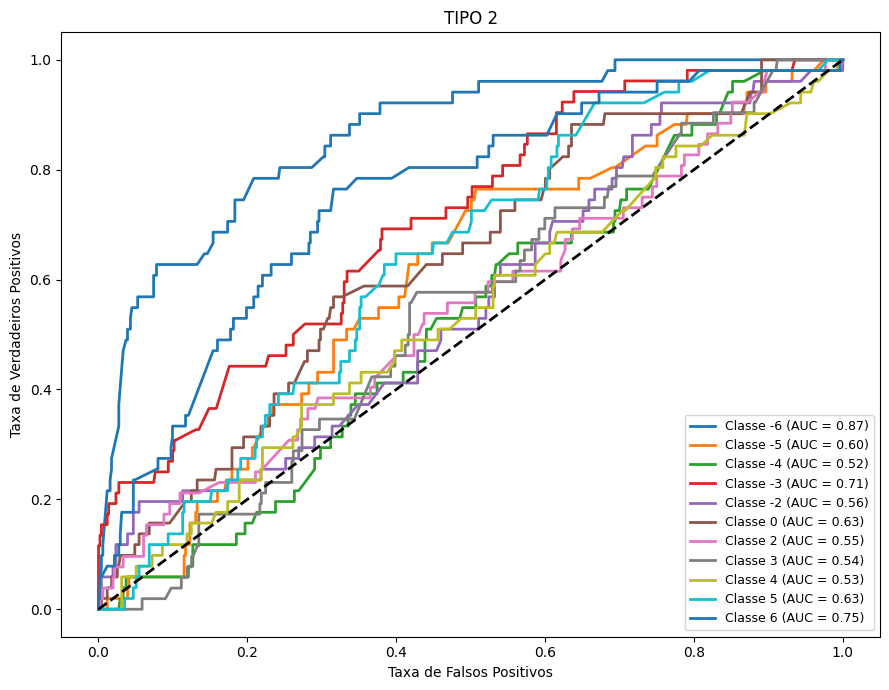

In [15]:
from sklearn.svm import LinearSVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import label_binarize
from sklearn.calibration import CalibratedClassifierCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from itertools import cycle
import numpy as np

labels_ordem = [-6, -5, -4, -3, -2, 0, 2, 3, 4, 5, 6]

y_bin = label_binarize(labels_svm, classes=labels_ordem)
n_classes = y_bin.shape[1]

X_train, X_test, y_train, y_test = train_test_split(
    X_svm_tfidf,
    labels_svm,
    test_size=0.2,
    random_state=42,
    stratify=labels_svm
)

y_test_bin = label_binarize(y_test, classes=labels_ordem)

base_svc = LinearSVC(
    max_iter=10000,
    class_weight="balanced"
)

calibrated_svc = CalibratedClassifierCV(
    estimator=base_svc,
    method='sigmoid',
    cv=3
)

clf_svc = OneVsRestClassifier(calibrated_svc)
clf_svc.fit(X_train, y_train)

y_score = clf_svc.predict_proba(X_test)

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
colors = cycle(plt.cm.tab10.colors)

plt.figure(figsize=(9, 7))

for i, color in zip(range(n_classes), colors):
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        lw=2,
        label=f'Classe {labels_ordem[i]} (AUC = {roc_auc[i]:0.2f})'
    )

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('TIPO 3')
plt.legend(loc='lower right', fontsize=9)
plt.grid(False)
plt.tight_layout()
plt.show()



<Figure size 800x700 with 0 Axes>

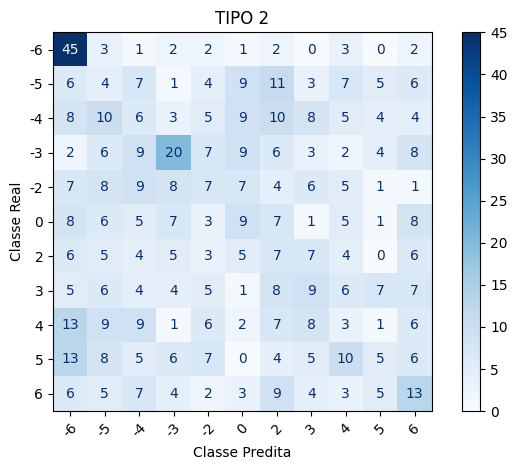

In [16]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# Ordem explícita das classes (MESMA do classification_report)
labels_ordem = [-6, -5, -4, -3, -2, 0, 2, 3, 4, 5, 6]

nomes_classes = [
    "-6",
    "-5",
    "-4",
    "-3",
    "-2",
    "0",
    "2",
    "3",
    "4",
    "5",
    "6"
]

# Gera as previsões do modelo treinado
y_svm_pred = clf_svm.predict(X_svm_test)

# Gera a matriz de confusão com ordem controlada
cm = confusion_matrix(
    y_svm_test,
    y_svm_pred,
    labels=labels_ordem
)

# Cria o display da matriz de confusão
disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=nomes_classes
)

# Plota a matriz de confusão
plt.figure(figsize=(8, 7))
disp.plot(
    cmap=plt.cm.Blues,
    values_format='d',
    xticks_rotation=45
)

plt.title("TIPO 3")
plt.xlabel("Classe Predita")
plt.ylabel("Classe Real")
plt.grid(False)
plt.tight_layout()
plt.show()

## **MANIPULAÇÃO DO CORPUS DESBALANCEADO**

# **TIPO 1**

In [18]:
import pandas as pd
import numpy as np

# Leitura do corpus e limpeza
df_corpus_linear_svc = pd.read_csv("/content/corpus_desbalanceado.csv")
df_corpus_svm_sem_na = df_corpus_linear_svc.dropna()

# Extração de textos e rótulos
textos_svm = list(df_corpus_svm_sem_na['texto_limpo'].values)
labels_svm = df_corpus_svm_sem_na['label_final'].values

# Vetorização com TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer_svm = TfidfVectorizer()
X_svm_tfidf = tfidf_vectorizer_svm.fit_transform(textos_svm)

# Separação dos dados em treino e teste
from sklearn.model_selection import train_test_split
X_svm_train, X_svm_test, y_svm_train, y_svm_test = train_test_split(
    X_svm_tfidf,
    labels_svm,
    test_size=0.25,
    random_state=0
)

# Treinamento do modelo SVM
from sklearn.svm import LinearSVC
clf_svm = LinearSVC()
clf_svm.fit(X_svm_train, y_svm_train)

# Predição e avaliação
from sklearn.metrics import classification_report
y_svm_pred = clf_svm.predict(X_svm_test)

print(classification_report(
    y_svm_test,
    y_svm_pred,
    target_names=["Positive", "Neutral", "Negative"]
))


              precision    recall  f1-score   support

    Positive       0.97      0.94      0.95      6276
     Neutral       0.96      0.97      0.97     30472
    Negative       0.94      0.93      0.94     10396

    accuracy                           0.96     47144
   macro avg       0.96      0.95      0.95     47144
weighted avg       0.96      0.96      0.96     47144



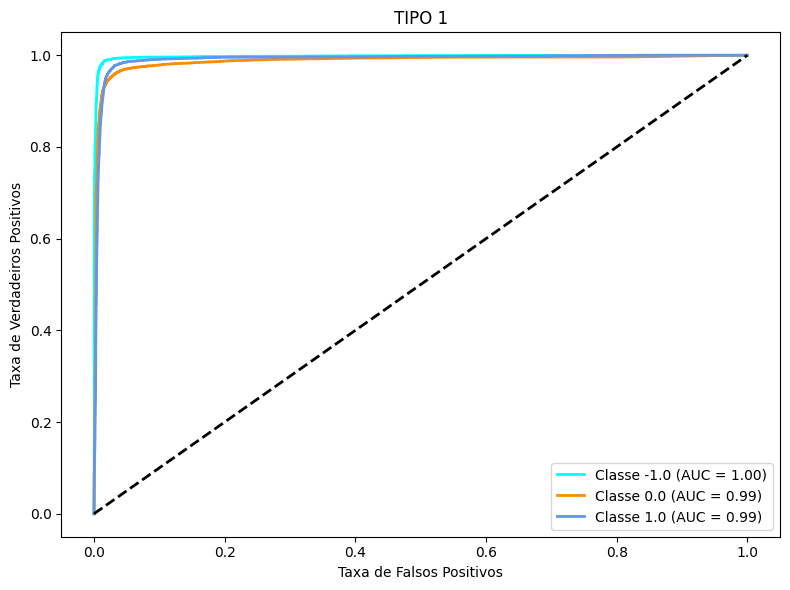

In [20]:
from sklearn.svm import LinearSVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import label_binarize
from sklearn.calibration import CalibratedClassifierCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from itertools import cycle
import numpy as np

# Binariza as labels para avaliação multiclasse
y_bin = label_binarize(labels_svm, classes=np.unique(labels_svm))
n_classes = y_bin.shape[1]

# Usa stratify para manter proporção das classes
X_train, X_test, y_train, y_test = train_test_split(X_svm_tfidf,
                                                    labels_svm,
                                                    test_size=0.2,
                                                    random_state=42,
                                                    stratify=labels_svm)

# Binariza o y_test (usado na avaliação ROC)
y_test_bin = label_binarize(y_test, classes=np.unique(labels_svm))

# Cria um modelo LinearSVC calibrado (com o nome do parâmetro correto para versões < 1.1)
base_svc = LinearSVC(max_iter=10000)
calibrated_svc = CalibratedClassifierCV(estimator=base_svc,
                                        method='sigmoid',
                                        cv=3)

# One-vs-Rest com SVC calibrado
clf_svc = OneVsRestClassifier(calibrated_svc)
clf_svc.fit(X_train, y_train)


# Previsões em forma de probabilidade
y_score = clf_svc.predict_proba(X_test)

# Calcula curva ROC e AUC para cada classe
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Gráfico ROC
colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
plt.figure(figsize=(8, 6))
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'Classe {np.unique(labels_svm)[i]} (AUC = {roc_auc[i]:0.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('TIPO 1')
plt.legend(loc='lower right')
plt.grid(False)
plt.tight_layout()
plt.show()

<Figure size 600x500 with 0 Axes>

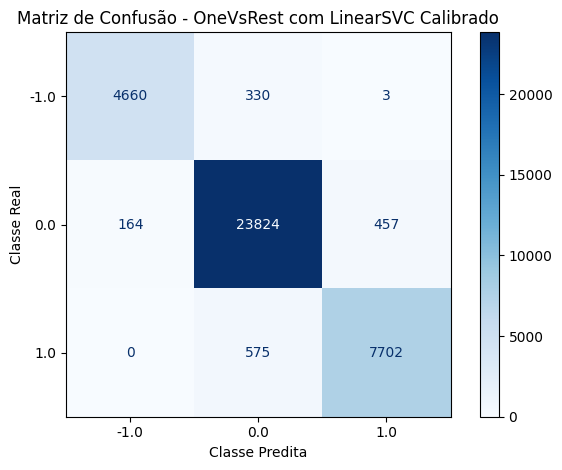

In [21]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Gera as previsões do modelo treinado
y_pred = clf_svc.predict(X_test)

# Gera a matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# Cria o display da matriz de confusão
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=np.unique(labels_svm))

# Plota a matriz de confusão
plt.figure(figsize=(6, 5))
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title("Matriz de Confusão - OneVsRest com LinearSVC Calibrado")
plt.xlabel("Classe Predita")
plt.ylabel("Classe Real")
plt.grid(False)
plt.tight_layout()
plt.show()


# **TIPO 2**

In [23]:
import pandas as pd
import numpy as np

# Leitura do corpus e limpeza
df_corpus_linear_svc = pd.read_csv("/content/corpus_desbalanceado.csv")
df_corpus_svm_sem_na = df_corpus_linear_svc.dropna()

# Extração de textos e rótulos
textos_svm = list(df_corpus_svm_sem_na['texto_limpo'].values)
labels_svm = df_corpus_svm_sem_na['espectro_tipo2'].values

# Vetorização com TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer_svm = TfidfVectorizer()
X_svm_tfidf = tfidf_vectorizer_svm.fit_transform(textos_svm)

# Separação dos dados em treino e teste
from sklearn.model_selection import train_test_split
X_svm_train, X_svm_test, y_svm_train, y_svm_test = train_test_split(
    X_svm_tfidf,
    labels_svm,
    test_size=0.25,
    random_state=0
)

# Treinamento do modelo SVM
from sklearn.svm import LinearSVC
clf_svm = LinearSVC()
clf_svm.fit(X_svm_train, y_svm_train)

# Predição e avaliação
from sklearn.metrics import classification_report
y_svm_pred = clf_svm.predict(X_svm_test)

labels_ordem = [-5, -4, -3, -2, 0, 2, 3, 4, 5, 6]

nomes_classes = [
    "-5",
    "-4",
    "-3",
    "-2",
    "0",
    "2",
    "3",
    "4",
    "5",
    "6"
]

print(classification_report(
    y_svm_test,
    y_svm_pred,
    labels=labels_ordem,
    target_names=nomes_classes
))



              precision    recall  f1-score   support

          -5       0.26      0.02      0.03       734
          -4       0.49      0.06      0.11      1541
          -3       0.52      0.29      0.37       715
          -2       0.43      0.06      0.11      2878
           0       0.52      0.78      0.62     19165
           2       0.54      0.19      0.28      5207
           3       0.55      0.20      0.29      1026
           4       0.12      0.01      0.01      1004
           5       0.42      0.30      0.35      8865
           6       0.58      0.77      0.66      8788

    accuracy                           0.52     49923
   macro avg       0.44      0.27      0.28     49923
weighted avg       0.50      0.52      0.47     49923



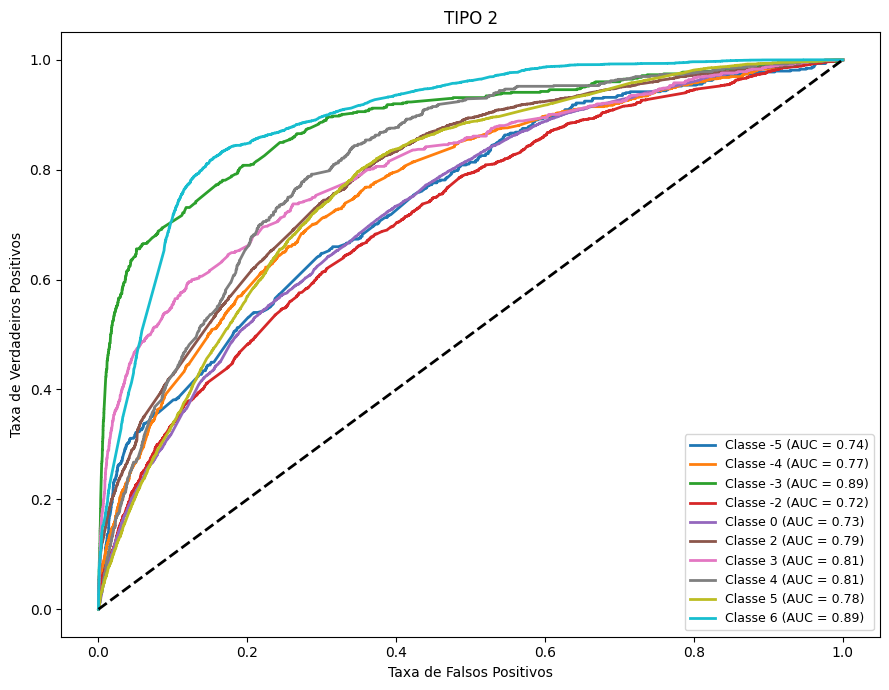

In [24]:
from sklearn.svm import LinearSVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import label_binarize
from sklearn.calibration import CalibratedClassifierCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from itertools import cycle
import numpy as np

labels_ordem = [-5, -4, -3, -2, 0, 2, 3, 4, 5, 6]

y_bin = label_binarize(labels_svm, classes=labels_ordem)
n_classes = y_bin.shape[1]

X_train, X_test, y_train, y_test = train_test_split(
    X_svm_tfidf,
    labels_svm,
    test_size=0.2,
    random_state=42,
    stratify=labels_svm
)

y_test_bin = label_binarize(y_test, classes=labels_ordem)

base_svc = LinearSVC(
    max_iter=10000,
    class_weight="balanced"
)

calibrated_svc = CalibratedClassifierCV(
    estimator=base_svc,
    method='sigmoid',
    cv=3
)

clf_svc = OneVsRestClassifier(calibrated_svc)
clf_svc.fit(X_train, y_train)

y_score = clf_svc.predict_proba(X_test)

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
colors = cycle(plt.cm.tab10.colors)

plt.figure(figsize=(9, 7))

for i, color in zip(range(n_classes), colors):
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        lw=2,
        label=f'Classe {labels_ordem[i]} (AUC = {roc_auc[i]:0.2f})'
    )

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('TIPO 2')
plt.legend(loc='lower right', fontsize=9)
plt.grid(False)
plt.tight_layout()
plt.show()



<Figure size 800x700 with 0 Axes>

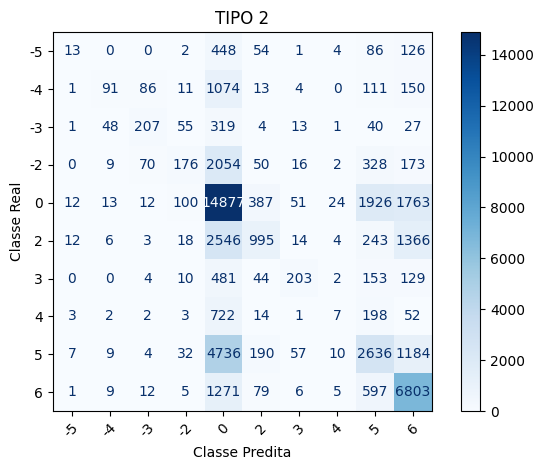

In [25]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# Ordem explícita das classes (MESMA do classification_report)
labels_ordem = [-5, -4, -3, -2, 0, 2, 3, 4, 5, 6]

nomes_classes = [
    "-5",
    "-4",
    "-3",
    "-2",
    "0",
    "2",
    "3",
    "4",
    "5",
    "6"
]

# Gera as previsões do modelo treinado
y_svm_pred = clf_svm.predict(X_svm_test)

# Gera a matriz de confusão com ordem controlada
cm = confusion_matrix(
    y_svm_test,
    y_svm_pred,
    labels=labels_ordem
)

# Cria o display da matriz de confusão
disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=nomes_classes
)

# Plota a matriz de confusão
plt.figure(figsize=(8, 7))
disp.plot(
    cmap=plt.cm.Blues,
    values_format='d',
    xticks_rotation=45
)

plt.title("TIPO 2")
plt.xlabel("Classe Predita")
plt.ylabel("Classe Real")
plt.grid(False)
plt.tight_layout()
plt.show()


# TIPO 3

In [26]:
import pandas as pd
import numpy as np

# Leitura do corpus e limpeza
df_corpus_linear_svc = pd.read_csv("/content/corpus_desbalanceado.csv")
df_corpus_svm_sem_na = df_corpus_linear_svc.dropna()

# Extração de textos e rótulos
textos_svm = list(df_corpus_svm_sem_na['texto_limpo'].values)
labels_svm = df_corpus_svm_sem_na['espectro_tipo3'].values

# Vetorização com TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer_svm = TfidfVectorizer()
X_svm_tfidf = tfidf_vectorizer_svm.fit_transform(textos_svm)

# Separação dos dados em treino e teste
from sklearn.model_selection import train_test_split
X_svm_train, X_svm_test, y_svm_train, y_svm_test = train_test_split(
    X_svm_tfidf,
    labels_svm,
    test_size=0.25,
    random_state=0
)

# Treinamento do modelo SVM
from sklearn.svm import LinearSVC
clf_svm = LinearSVC()
clf_svm.fit(X_svm_train, y_svm_train)

# Predição e avaliação
from sklearn.metrics import classification_report
y_svm_pred = clf_svm.predict(X_svm_test)

labels_ordem = [-6,-5, -4, -3, -2, 0, 2, 3, 4, 5, 6]

nomes_classes = [
    "-6",
    "-5",
    "-4",
    "-3",
    "-2",
    "0",
    "2",
    "3",
    "4",
    "5",
    "6"
]

print(classification_report(
    y_svm_test,
    y_svm_pred,
    labels=labels_ordem,
    target_names=nomes_classes
))



              precision    recall  f1-score   support

          -6       0.00      0.00      0.00        59
          -5       0.04      0.00      0.00       585
          -4       0.10      0.00      0.01       647
          -3       0.46      0.09      0.15       416
          -2       0.57      0.19      0.29      3277
           0       0.48      0.91      0.63     20889
           2       0.29      0.06      0.10      4934
           3       0.28      0.06      0.10      2776
           4       0.17      0.01      0.03      2350
           5       0.30      0.06      0.10      5264
           6       0.54      0.40      0.46      8726

    accuracy                           0.48     49923
   macro avg       0.29      0.16      0.17     49923
weighted avg       0.42      0.48      0.39     49923



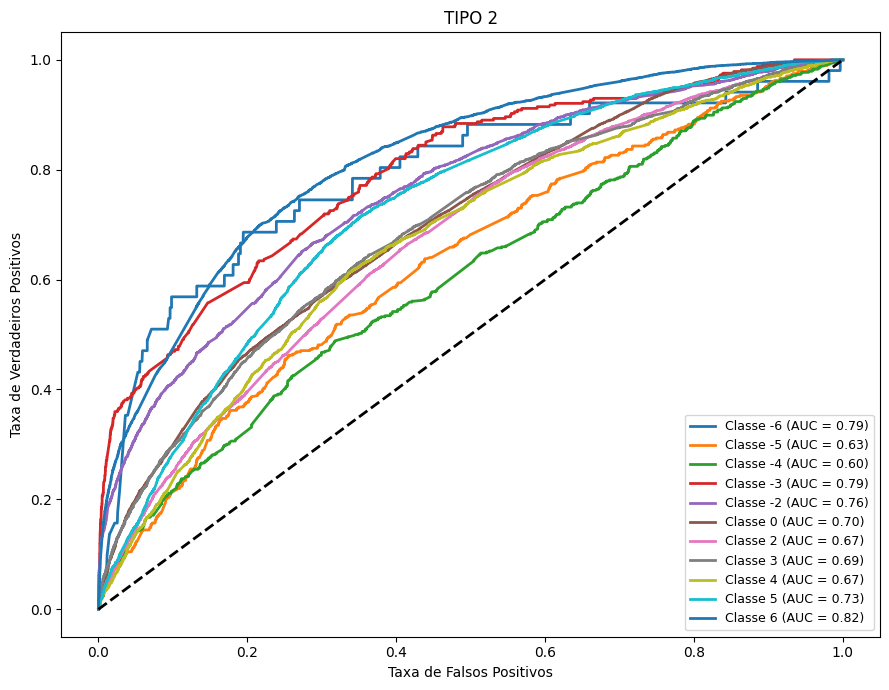

In [27]:
from sklearn.svm import LinearSVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import label_binarize
from sklearn.calibration import CalibratedClassifierCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from itertools import cycle
import numpy as np

labels_ordem = [-6, -5, -4, -3, -2, 0, 2, 3, 4, 5, 6]

y_bin = label_binarize(labels_svm, classes=labels_ordem)
n_classes = y_bin.shape[1]

X_train, X_test, y_train, y_test = train_test_split(
    X_svm_tfidf,
    labels_svm,
    test_size=0.2,
    random_state=42,
    stratify=labels_svm
)

y_test_bin = label_binarize(y_test, classes=labels_ordem)

base_svc = LinearSVC(
    max_iter=10000,
    class_weight="balanced"
)

calibrated_svc = CalibratedClassifierCV(
    estimator=base_svc,
    method='sigmoid',
    cv=3
)

clf_svc = OneVsRestClassifier(calibrated_svc)
clf_svc.fit(X_train, y_train)

y_score = clf_svc.predict_proba(X_test)

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
colors = cycle(plt.cm.tab10.colors)

plt.figure(figsize=(9, 7))

for i, color in zip(range(n_classes), colors):
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        lw=2,
        label=f'Classe {labels_ordem[i]} (AUC = {roc_auc[i]:0.2f})'
    )

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('TIPO 3')
plt.legend(loc='lower right', fontsize=9)
plt.grid(False)
plt.tight_layout()
plt.show()

<Figure size 800x700 with 0 Axes>

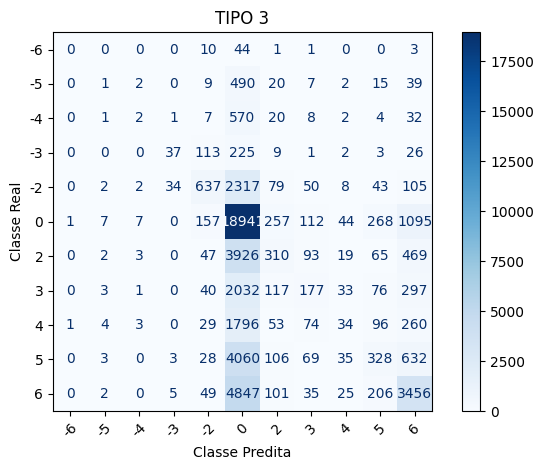

In [28]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# Ordem explícita das classes (MESMA do classification_report)
labels_ordem = [-6, -5, -4, -3, -2, 0, 2, 3, 4, 5, 6]

nomes_classes = [
    "-6",
    "-5",
    "-4",
    "-3",
    "-2",
    "0",
    "2",
    "3",
    "4",
    "5",
    "6"
]

# Gera as previsões do modelo treinado
y_svm_pred = clf_svm.predict(X_svm_test)

# Gera a matriz de confusão com ordem controlada
cm = confusion_matrix(
    y_svm_test,
    y_svm_pred,
    labels=labels_ordem
)

# Cria o display da matriz de confusão
disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=nomes_classes
)

# Plota a matriz de confusão
plt.figure(figsize=(8, 7))
disp.plot(
    cmap=plt.cm.Blues,
    values_format='d',
    xticks_rotation=45
)

plt.title("TIPO 3")
plt.xlabel("Classe Predita")
plt.ylabel("Classe Real")
plt.grid(False)
plt.tight_layout()
plt.show()